<a href="https://colab.research.google.com/github/oconcito8/aprendizaje-automatico-entregas-recu/blob/main/practica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 4 Aprendizaje Automático.

### Algoritmos genético para la optimización

---
Carlos Ocón Garay

Grupo: B08

En esta práctica, utilizaremos el algoritmo genético para optimizar funciones. Los algoritmos genéticos son técnicas de optimización inspiradas en el proceso de selección natural. Son particularmente útiles para problemas complejos con espacios de búsqueda grandes y no lineales.



## EJERCICIO 1:

In [2]:
!pip install deap
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install scoop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scoop: filename=scoop-0.7.2.0-py3-none-any.whl size=78112 sha256=f28ad5e34bc939ace9fa7c2f921342bb1a0ae0eab067b39f116428cbb44d72d2
  Stored in directory: /root/.cache/pip/wheels/26/c6/da/088e4bffcfbc33fa40644ca636267bc801c8fd9eef973483db
Successfully built scoop


# Importación de Librerías

In [9]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random
from scipy.optimize import minimize
from deap import base, creator, tools, algorithms
import random


# Definición de la Función para Graficar la Evolución del Fitness

In [10]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    # Información sobre el número de generaciones
    gen = log.select("gen")
    # Mínimos, máximos y media de la función de aptitud en cada generación
    fit_mins = np.array(log.select("min"))
    fit_maxs = np.array(log.select("max"))
    fit_ave = np.array(log.select("avg"))

    # Asegurar que todas las listas tengan la misma longitud
    min_len = min(len(gen), len(fit_mins), len(fit_maxs), len(fit_ave))
    gen = gen[:min_len]
    fit_mins = fit_mins[:min_len]
    fit_maxs = fit_maxs[:min_len]
    fit_ave = fit_ave[:min_len]

    # Representación de los valores anteriores
    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha=0.2)

    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi=300)

# Función picos

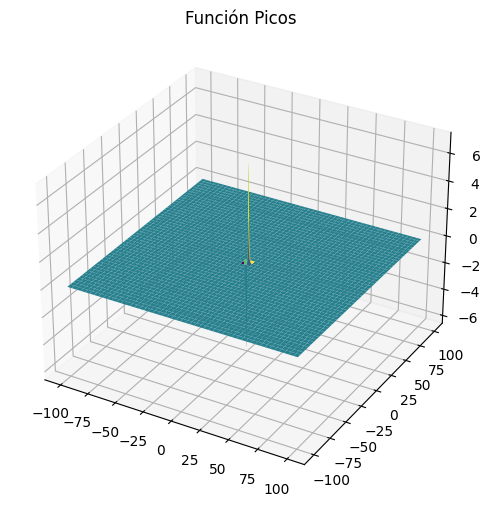

Resultado 1: Punto [-0.00931757  1.58136796], Valor 8.106213589442339
Resultado 2: Punto [-0.00931758  1.58136796], Valor 8.106213589442335
Resultado 3: Punto [-0.46002452 -0.62919642], Valor 3.776580998532111


In [11]:
# Definir la función "picos"
def picos(x):
    x, y = x
    return (3 * (1 - x)**2 * np.exp(-(x**2) - (y + 1)**2)
            - 10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2)
            - 1 / 3 * np.exp(-(x + 1)**2 - y**2))

# Crear una malla para visualizar la función
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
X, Y = np.meshgrid(x, y)
Z = picos((X, Y))

# Visualización en 3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('Función Picos')
plt.show()

# Encontrar los máximos utilizando scipy.optimize
# Debido a la complejidad de la función, se pueden probar diferentes puntos iniciales
initial_guesses = [(-2, 2), (2, -2), (0, 0)]
results = []

for guess in initial_guesses:
    res = minimize(lambda x: -picos(x), guess, bounds=[(-100, 100), (-100, 100)])
    results.append(res)

# Mostrar los resultados
for i, res in enumerate(results):
    print(f"Resultado {i+1}: Punto {res.x}, Valor {-res.fun}")


Busca los máximos de la función 'picos' utilizando diferentes puntos iniciales para asegurar una búsqueda efectiva en el espacio de la función. La visualización en 3D proporciona una representación clara de la función, mientras que la optimización muestra los puntos máximos encontrados y sus respectivos valores. Estos pasos demuestran el proceso de utilizar algoritmos de optimización para resolver problemas complejos de búsqueda de máximos.

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


[[0.7367308287773042, 2.029141973670675], [0.7026977680719524, 3.674764931125665], [1.2182219948205137, -2.4489890699176753], [3.295561727991764, 4.9401007035072855], [4.749639272624131, -1.3610862650353903], [2.798741481130474, -0.8695424287023972], [0.5796349629506086, -2.992016533643077], [-4.600171123350945, 4.130054770587732], [0.02868317738758197, -0.9954408631767411], [-0.11488854625677014, 0.606675528968573], [0.5031746132140711, -0.4892994157784205], [2.026013604849651, 3.344361869347191], [-4.957410107921328, 2.388215154349364], [-3.197020924239954, 4.8984494928755105], [2.7001339510344256, -3.225736345029353], [-4.162763412999268, 4.496261605215238], [0.7718378033723594, -1.6696346399279696], [-2.3054943250669293, -0.4845572101437483], [-1.3056896523143733, -4.105305520306207], [-4.469400638928019, 2.155659074921915], [1.5169864011331686, -1.7533746637543492], [-1.040732840449773, -0.25616464188673493], [-3.6806501656633737, -4.076647709903089], [4.990721841749123, -0.109390

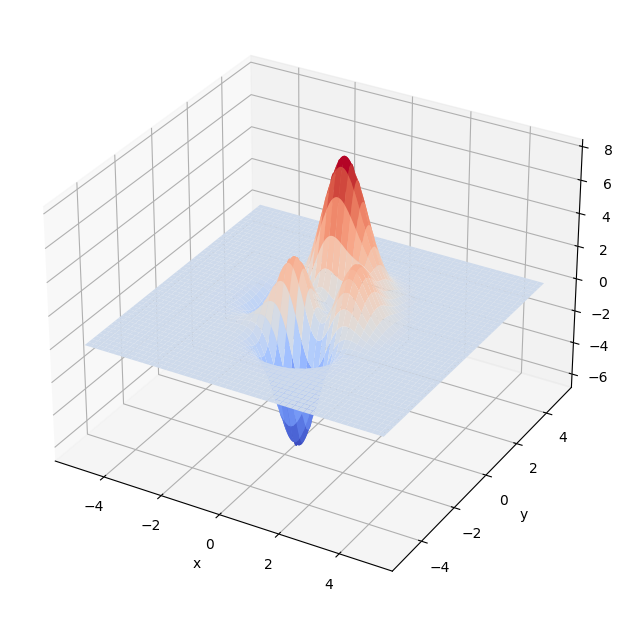

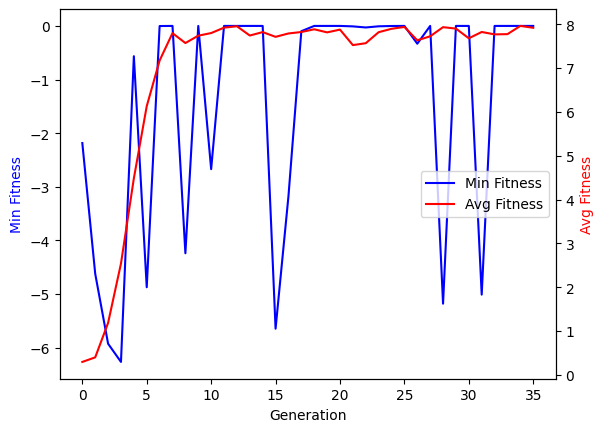

In [12]:
# Generamos vectores nuevos
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

# Evaluamos todos los nuevos valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([picos(val) for val in vals], (1000, 1000))

# Mostramos el resultado
figure_3d = plt.figure(figsize=(8, 6))
ax = figure_3d.add_axes([0, 0, 1, 1], projection='3d')
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

toolbox.register("attr_uniform", random.uniform, -5, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_uniform, 2)
individuo = toolbox.individual()

# Definimos el tamaño de la población
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 128)
poblacion = toolbox.population()
print(poblacion)
len(poblacion)

# Registro de operaciones genéticas
def evaluate(individual):
    return (picos(individual),)  # Asegurarse de que devuelve una tupla

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Función del Algoritmo Genético
def mainF1():
    random.seed(8)
    CXPB, MUTPB, NGEN = 0.7, 0.2, 35
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()

    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)
    return hof, logbook

best1, log1 = mainF1()
print("Mejor fitness: %f" % best1[0].fitness.values)
print("Mejor individuo %s" % best1[0])

# Función para plotear la evolución
def plot_evolucion(logbook):
    gen = logbook.select("gen")
    fit_mins = logbook.select("min")
    fit_avgs = logbook.select("avg")

    fig, ax1 = plt.subplots()
    line1 = ax1.plot(gen, fit_mins, "b-", label="Min Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Min Fitness", color="b")

    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, fit_avgs, "r-", label="Avg Fitness")
    ax2.set_ylabel("Avg Fitness", color="r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="center right")

    plt.show()

plot_evolucion(log1)


## EJERCICIO 2:

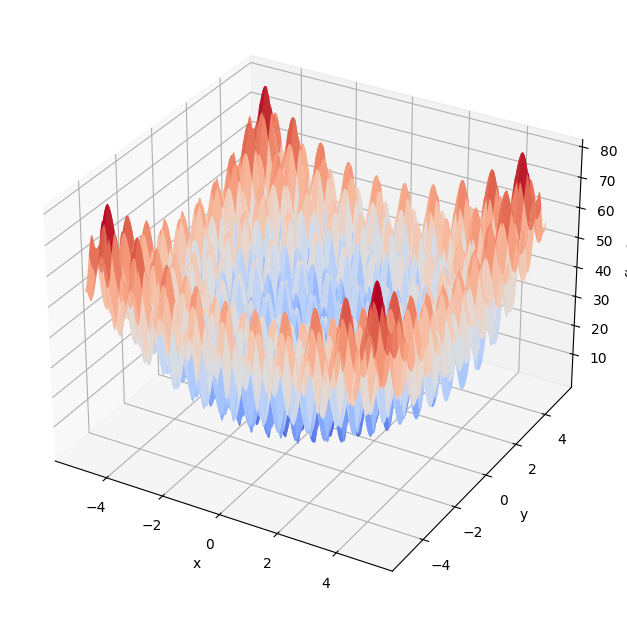

In [13]:
# Definir la función de Rastrigin
def rastrigin_function(individual):
    A = 10
    n = len(individual)
    return A * n + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in individual]),

# Generar vectores que barran todo el dominio
x = np.linspace(-5.12, 5.12, 1000)
y = np.linspace(-5.12, 5.12, 1000)

# Evaluar todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([rastrigin_function(val) for val in vals], (1000, 1000))

# Representar los resultados obtenidos
figure_3d = plt.figure(figsize=(8, 6))
ax = figure_3d.add_axes([0, 0, 1, 1], projection='3d')
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
plt.show()


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg    	std    	min    	max   
0  	640   	184.051	33.0483	92.3763	281.18
1  	501   	149.094	27.1882	88.7934	246.93
2  	527   	121.913	22.6091	60.4923	240.226
3  	511   	102.033	21.5118	52.2914	237.236
4  	519   	83.498 	18.5703	41.425 	187.791
5  	520   	69.9364	19.7154	33.2341	203.43 
6  	512   	56.7225	17.7356	26.0015	204.835
7  	505   	48.9526	17.6739	24.385 	185.539
8  	512   	42.4182	16.8589	20.0357	140.356
9  	511   	35.5216	15.2873	13.1694	146.32 
10 	524   	29.434 	12.9707	12.5914	120.748
11 	504   	26.2687	15.6879	10.4945	162.01 
12 	495   	23.0087	16.348 	8.16864	152.384
13 	518   	19.1543	14.3729	8.01891	128.146
14 	515   	17.1023	15.1137	6.94193	108.073
15 	518   	16.0678	16.4178	6.19677	149.828
16 	513   	13.2502	12.6928	6.19677	102.985
17 	514   	13.9667	15.9647	5.77295	140.644
18 	520   	11.4037	13.3521	5.25736	155.88 
19 	512   	11.2885	13.3191	5.25736	106.239
20 	535   	11.941 	15.4664	4.27017	114.009
21 	482   	11.2099	15.3204	4.27017	126.324
22 	517   	11.

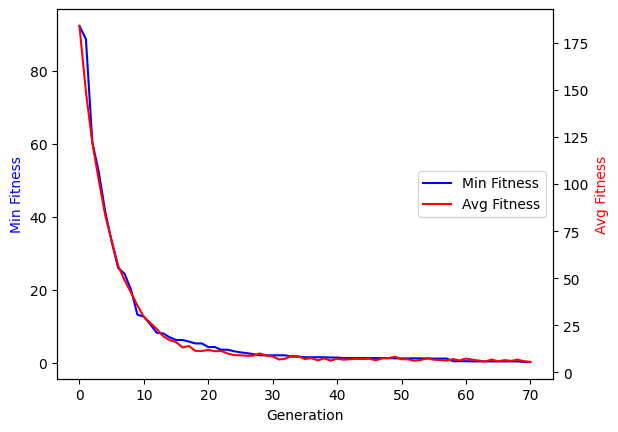

In [15]:
# Crear los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox2 = base.Toolbox()

# Generación de genes en el rango deseado
toolbox2.register("attr_float", random.uniform, -5.12, 5.12)

# Generación de individuos y población
toolbox2.register("individual", tools.initRepeat, creator.Individual, toolbox2.attr_float, n=10)

# Definir el tamaño de la población
toolbox2.register("population", tools.initRepeat, list, toolbox2.individual, 640)

# Registro de operaciones genéticas
toolbox2.register("evaluate", rastrigin_function)
toolbox2.register("mate", tools.cxOnePoint)
toolbox2.register("mutate", tools.mutGaussian, mu=0, sigma=3, indpb=0.1)
toolbox2.register("select", tools.selTournament, tournsize=5)

# Función del Algoritmo Genético
def mainF2():
    random.seed(30)
    CXPB, MUTPB, NGEN = 0.7, 0.3, 70
    pop = toolbox2.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()

    pop, logbook = algorithms.eaSimple(pop, toolbox2, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)
    return hof, logbook

best2, log2 = mainF2()
print("Mejor fitness: %f" % best2[0].fitness.values)
print("Mejor individuo %s" % best2[0])

# Función para plotear la evolución
def plot_evolucion(logbook):
    gen = logbook.select("gen")
    fit_mins = logbook.select("min")
    fit_avgs = logbook.select("avg")

    fig, ax1 = plt.subplots()
    line1 = ax1.plot(gen, fit_mins, "b-", label="Min Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Min Fitness", color="b")

    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, fit_avgs, "r-", label="Avg Fitness")
    ax2.set_ylabel("Avg Fitness", color="r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="center right")

    plt.show()

plot_evolucion(log2)


# Cambiar la función de cruce a dos puntos

gen	nevals	avg    	std    	min    	max   
0  	640   	184.051	33.0483	92.3763	281.18
1  	492   	149.654	27.3818	55.6601	271.193
2  	487   	123.35 	24.3583	28.0557	272.975
3  	489   	101.078	22.9373	27.1832	193.952
4  	497   	80.9689	21.3929	23.6901	184.674
5  	487   	63.721 	20.3578	21.2869	195.752
6  	514   	47.3828	17.7405	17.6278	172.98 
7  	504   	37.3864	17.3477	16.1152	179.406
8  	528   	30.425 	14.9184	12.0249	118.943
9  	511   	24.5045	12.5247	8.47043	119.088
10 	512   	22.2191	14.3027	8.47043	132.334
11 	514   	19.3194	14.2451	8.47043	130.264
12 	504   	17.2433	14.4425	7.64728	124.598
13 	493   	17.5341	17.9253	7.30304	146.681
14 	515   	14.8605	14.967 	6.19233	131.955
15 	511   	13.8112	15.0905	6.19233	136.077
16 	529   	13.0136	15.1471	6.05796	140.118
17 	513   	12.3404	15.019 	5.41215	102.682
18 	523   	10.9822	13.0636	5.05355	125.26 
19 	528   	10.9064	13.6011	4.95087	117.33 
20 	522   	11.6524	14.6456	4.14996	108.956
21 	508   	11.4702	17.2252	4.01619	144.199
22 	505   	10

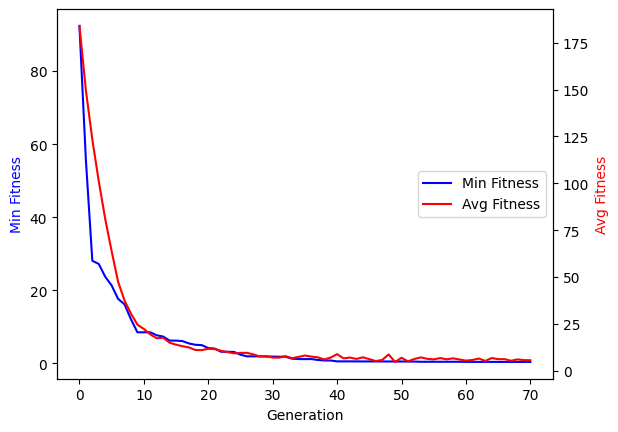

In [16]:
# Cambiar la función de cruce a dos puntos
toolbox2.register("mate", tools.cxTwoPoint)

def mainF22():
    random.seed(30)
    CXPB, MUTPB, NGEN = 0.7, 0.3, 70
    pop = toolbox2.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()

    pop, logbook = algorithms.eaSimple(pop, toolbox2, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)
    return hof, logbook

best22, log22 = mainF22()
print("Mejor fitness: %f" % best22[0].fitness.values)
print("Mejor individuo %s" % best22[0])

plot_evolucion(log22)
